# Sequence Feature Viz for Master Thesis

In [1]:
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import utils

from matplotlib import font_manager as fm
font_path = r'C:\Users\Felix\AppData\Local\Microsoft\Windows\Fonts\SourceSansPro-Regular.ttf'
fm.fontManager.addfont(font_path)
source_sans_pro = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = source_sans_pro.get_name()

## Example: Sequence and Structure Visualization

In [5]:
# STORE = False
STORE = True

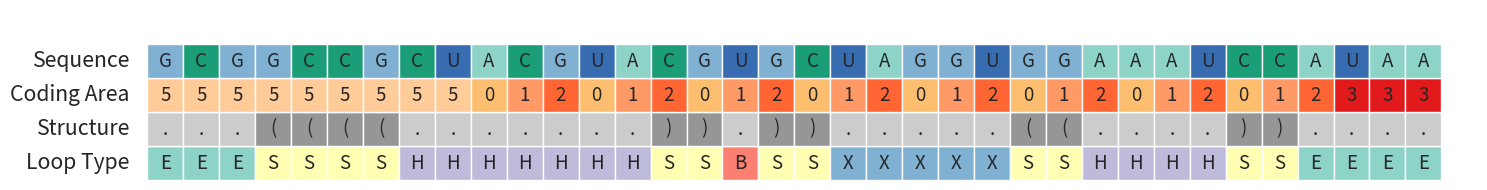

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define a sample sequence (~36 nt) with a fully nucleotide-based 5' tail and a small 3' tail.
# We'll have:
# - 5' tail: 3 nucleotides
# - Coding region: 30 nucleotides (for a nice multiple of codons)
# - 3' tail: 3 nucleotides
#
# Total = 36 nucleotides

five_prime_tail = "GCGGCCGCU"                     # 5' tail (3 nt)
coding_region = "ACGUACGUGCUAGGUGGAAAUCCA"  # coding region (30 nt)
three_prime_tail = "UAA"                    # 3' tail (3 nt)

sequence = five_prime_tail + coding_region + three_prime_tail
seq_list = list(sequence)

# Annotate coding:
# Indices: 0-based
# 0-2 (5' tail) => '5'
# 33-35 (3' tail) => '3'
# 3-32 (coding region) => codon frames 0,1,2 repeating
coding_annotation = []
for i in range(len(seq_list)):
    if i < len(five_prime_tail):
        coding_annotation.append('5')
    elif i >= len(five_prime_tail) + len(coding_region):
        coding_annotation.append('3')
    else:
        frame = (i - 3) % 3
        coding_annotation.append(str(frame))

# Create a hypothetical structure (dot-bracket) of length 36
# Just a pattern for visualization:
structure_str   = "...((((.......)).)).....((....))...."
loop_annotation = "EEESSSSHHHHHHHSSBSSXXXXXSSHHHHSSEEEE"
structure_list = list(structure_str)

# Assign loop types:
# For simplicity: '(' or ')' => 'S' (stem), '.' => 'H' (hairpin)

# Original rows were: Sequence, Coding, Structure, Loop Type
# Flip the order: Loop Type, Structure, Coding, Sequence
data = [loop_annotation, structure_list, coding_annotation, seq_list]
row_labels = ["Loop Type", "Structure", "Coding Area", "Sequence"]

fig, ax = plt.subplots(figsize=(15, 2))
# plt.rcParams.update({'font.size': 16})
ax.axis('off')

TOKENS = "ACGU01235.()ESHBX"
colors = [
    "#8dd3c7",  # A (light teal)
    "#1b9e77",  # C (dark teal)
    "#80b1d3",  # G (light blue)
    "#386cb0",  # U (dark blue)
    "#fdbf6f",  # 0 (light orange)
    "#ff9966",  # 1 (medium orange)
    "#ff6633",  # 2 (dark orange)
    "#e31a1c",  # 3 (red, high contrast)
    "#ffcc99",  # 5 (bright yellow)
    "#cccccc",  # . (light grey for loops)
    "#969696",  # ( (neutral grey for structure)
    "#969696",  # ) (neutral grey for structure)
    "#8dd3c7",  # E (soft purple for external loops)
    "#ffffb3",  # S (light teal, similar to A for stems)
    "#bebada",  # H (soft yellow for hairpins)
    "#fb8072",  # B (soft pink for bulges)
    "#80b1d3",  # X (light blue for unknowns)
]


# cmap = plt.get_cmap('viridis')
# length = len(TOKENS) + 7
# colors = [cmap(i / (length - 1)) for i in range(length)]
# colors = colors[::-1]

# We'll define colors similarly as before
for row_idx, row_data in enumerate(data):
    for col_idx, char in enumerate(row_data):
        # Determine color based on row
        color = colors[TOKENS.index(char.upper())]
        # if row_labels[row_idx] == "Sequence":
        #     # Color by nucleotide
        #     color = colors[TOKENS.index(char.upper())]
        # elif row_labels[row_idx] == "Coding":
        #     # Coding annotation: 5 and 3 for tails = yellow, frames = 0,1,2 different colors
        #     color = colors[TOKENS.index(char)]
        # elif row_labels[row_idx] == "Structure":
        #     # '(' or ')' = stems (blue), '.' = loop (white)
        #     color = colors[TOKENS.index(char)-1]
        # else: # Loop Type
        #     # 'S' = stem (green), 'H' = hairpin (orange)
        #     color = colors[TOKENS.index(char)-1]

        rect = patches.Rectangle((col_idx, -row_idx), 1, 1, facecolor=color, edgecolor='white')
        ax.add_patch(rect)
        ax.text(col_idx+0.5, -row_idx+0.5, char, ha='center', va='center', fontsize=15)

# Add row labels on the left
for i, label in enumerate(row_labels):
    ax.text(-0.5, -i+0.5, label, ha='right', va='center', fontsize=17, fontweight='bold')

# Adjust plot limits
ax.set_xlim(-1, len(seq_list)+1)
ax.set_ylim(-len(data), 1)
ax.invert_yaxis()

plt.tight_layout()

# store as svg
if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + "/example_sequence_struc.pdf", format="pdf", bbox_inches="tight")

plt.show()